### EDA

#### Libraries

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Preparing Data

##### Reading and filtering

In [66]:
bd_all = pd.read_spss('BD_cuarto_rec_adh_corr.sav')

# Filter the dataset to work only with alcohol patients
bd = bd_all[bd_all['Alcohol_DxCIE'] == 'Sí']

# Filter the dataset to work only with 'Situacion_tratamiento' == 'Abandono' or 'Alta'
bd = bd[(bd['Situacion_tratamiento'] == 'Abandono') | (bd['Situacion_tratamiento'] == 'Alta terapéutica')]

##### Minor fixes

In [45]:
# 9.0 represents unknown according to Variables.docx  -> replace it
print(bd['Social_inclusion'].unique())
bd['Social_inclusion'] = bd['Social_inclusion'].replace('9.0', 'Unknown')
print(bd['Social_inclusion'].unique())

['Live with families or friends' 'live alone' 'live in institutions' '9.0']
['Live with families or friends' 'live alone' 'live in institutions'
 'Unknown']


##### Defining sets of patients

In [67]:
# Pre-pandemic
conj_pre = bd[bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio y fin prepandemia']
# Pre-pandemic abandono
pre_abandono = conj_pre[conj_pre['Situacion_tratamiento'] == 'Abandono']
# Pre-pandemic alta
pre_alta = conj_pre[conj_pre['Situacion_tratamiento'] == 'Alta terapéutica']

# Post-pandemic
# Merging last two classes to balance sets
conj_post = bd[(bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio prepandemia y fin en pandemia') | 
               (bd['Pandemia_inicio_fin_tratamiento'] == 'inicio y fin en pandemia')]
# Post-pandemic abandono
post_abandono = conj_post[conj_post['Situacion_tratamiento'] == 'Abandono']
# Post-pandemic alta
post_alta = conj_post[conj_post['Situacion_tratamiento'] == 'Alta terapéutica']

# Concatenate the two data frames and add a new column to distinguish between them. Useful for plots
conj_post['Group'] = 'Post'
conj_pre['Group'] = 'Pre'
combined_pre_post = pd.concat([conj_post, conj_pre])

C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_19876\2495984927.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conj_post['Group'] = 'Post'
C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_19876\2495984927.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conj_pre['Group'] = 'Pre'


#### First Steps

##### Inspecting the dataframes

In [47]:
print("PRE")
print(conj_pre.info())
print ("-------------------------------")
print("PRE-ABANDONO")
print(pre_abandono.info())
print ("-------------------------------")
print("PRE-ALTA")
print(pre_alta.info())
print ("-------------------------------")

print("\n\n\n")

print ("POST")
print(conj_post.info())
print ("-------------------------------")
print("POST-ABANDONO")
print(post_abandono.info())
print ("-------------------------------")
print("POST-ALTA")
print(post_alta.info())
print ("-------------------------------")

PRE
<class 'pandas.core.frame.DataFrame'>
Index: 22861 entries, 1 to 76940
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CODPROYECTO                          22861 non-null  float64
 1   Education                            22861 non-null  object 
 2   Social_protection                    22861 non-null  object 
 3   Job_insecurity                       22861 non-null  object 
 4   Housing                              22861 non-null  object 
 5   Alterations_early_childhood_develop  22861 non-null  object 
 6   Social_inclusion                     22861 non-null  object 
 7   Risk_stigma                          22861 non-null  object 
 8   Structural_conflic                   22861 non-null  float64
 9   Age                                  22852 non-null  float64
 10  Sex                                  22861 non-null  object 
 11  Sexo_x_Hijos                 

##### Quantifying Null Values

In [48]:
print(f"Total missing values Age: {bd['Age'].isnull().sum()}")
print(f"Total missing values Años_consumo_droga: {bd['Años_consumo_droga'].isnull().sum()}")

print("\tCONJUNTO PREPANDEMIA")
print(f"\t\tMissing values Age: {conj_pre['Age'].isnull().sum()}")
print(f"\t\tMissing values Años_consumo_droga: {conj_pre['Años_consumo_droga'].isnull().sum()}")

print("\tCONJUNTO POSTPANDEMIA")
print(f"\t\tMissing values Age: {conj_post['Age'].isnull().sum()}")
print(f"\t\tMissing values Años_consumo_droga: {conj_post['Años_consumo_droga'].isnull().sum()}")

Total missing values Age: 10
Total missing values Años_consumo_droga: 718
	CONJUNTO PREPANDEMIA
		Missing values Age: 9
		Missing values Años_consumo_droga: 519
	CONJUNTO POSTPANDEMIA
		Missing values Age: 1
		Missing values Años_consumo_droga: 199


##### Other unexpected behavior

In [49]:
print(len(bd[bd['Alterations_early_childhood_develop'] == ''])) # To be reported
print(len(bd[bd['Periodos_COVID'] == ''])) # To be reported

2
3


#### Distribution of variables

##### Classifying variables into numerical and discrete/categorical 

In [50]:
disc_atts = ['Education', 'Social_protection', 'Job_insecurity', 'Housing',
        'Alterations_early_childhood_develop', 'Social_inclusion',
        'Risk_stigma', 'Sex', 'Sexo_x_Hijos', 'Smoking', 'Biological_vulnerability',
        'Opiaceos_DxCIE', 'Cannabis_DXCIE', 'BZD_DxCIE', 'OtrosEst_DxCIE',
        'Alucinogenos_DXCIE', 'Tabaco_DXCIE', 'SustVolatiles_DXCIE',
        'JuegoPat_DxCIE', 'Droga_Ppal_REC', 'FrecuenciaConsumo30Dias',
        'OtrosDx_Psiquiatrico', 'Tx_previos', 'Seis_mas_Citas', 
        'Readmisiones_estudios', 
        'Nreadmision'
        ]

num_atts = ['Structural_conflic', 'Adherencia_tto_recalc', 'Age', 'Años_consumo_droga', 'Tiempo_tx']

##### Distribution of discrete attributes

###### Count plots

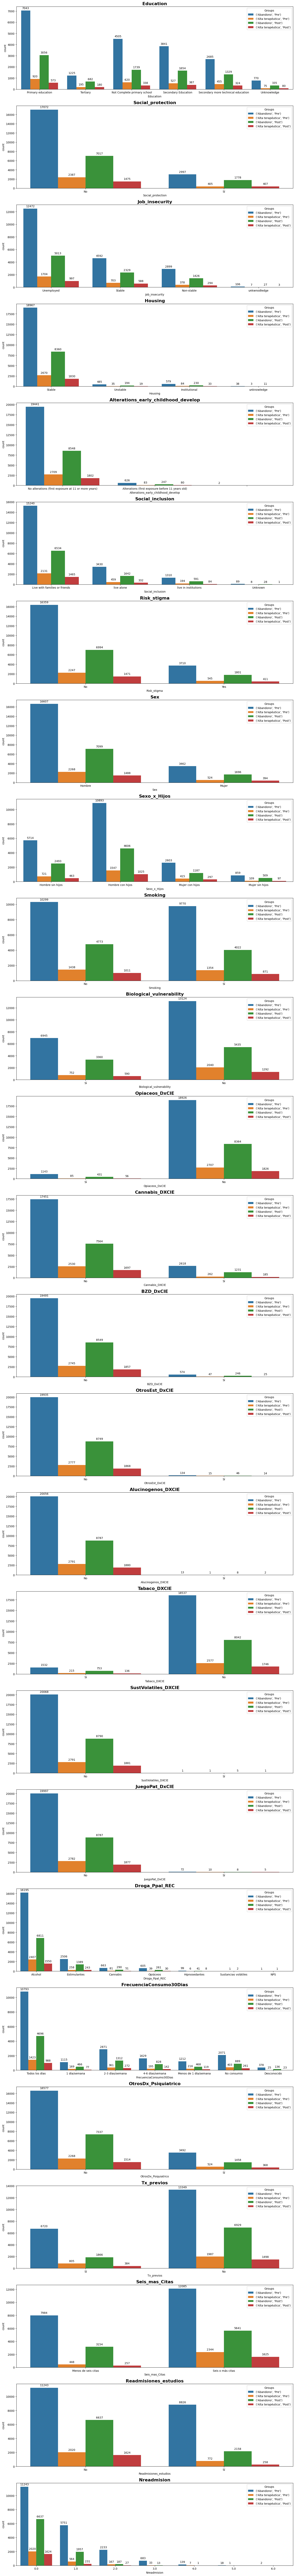

In [51]:
fig, axs = plt.subplots(len(disc_atts), 1, figsize=(15, 5*len(disc_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.25)

for i, disc_att in enumerate(disc_atts):
    ax = sns.countplot(x=disc_att, data=combined_pre_post, hue=combined_pre_post[['Situacion_tratamiento', 'Group']].apply(tuple, axis=1),
                       hue_order=[('Abandono', 'Pre'),('Alta terapéutica', 'Pre'), ('Abandono', 'Post'), ('Alta terapéutica', 'Post')],
                       ax=axs[i])
    ax.set_title(disc_att, fontsize=16, fontweight='bold')
    ax.get_legend().set_title("Groups")
    
    # Adding count annotations
    for p in ax.patches:
        if p.get_label() == '_nolegend_':
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./results" folder
plt.savefig('./results/countplots.svg', dpi=600, bbox_inches='tight')

###### Normalized count plots

In [52]:
# Function to plot countplot 
def plot_count_perc_norm(i: int, group:int, disc_att:str) -> None:
    """
        group: 1 (all), 2 (pre), 3 (post) 
    """

    # Define data to work with based on group
    if group == 1:
        df = bd 
    elif group == 2:
        df = conj_pre
    elif group == 3:
        df = conj_post

    # GOAL: find percentage of each possible category within the total of its situacion_tto subset
    # Group data by 'Situacion_tratamiento' and 'Education' and count occurrences
    grouped_counts = df.groupby(['Situacion_tratamiento', disc_att]).size().reset_index(name='count')
    # Calculate total count for each 'Situacion_tratamiento' group
    total_counts = df.groupby('Situacion_tratamiento')[disc_att].count()
    # Divide each count by its corresponding total count and calculate percentage
    grouped_counts['percentage'] = grouped_counts.apply(lambda row: row['count'] / total_counts[row['Situacion_tratamiento']] * 100, axis=1)
    
    # Follow the same order in plot as in computations
    col_order = grouped_counts[grouped_counts['Situacion_tratamiento'] == 'Abandono'][disc_att].tolist()

    # Create countplot and split each bar into two based on the value of sit_tto
    ax = sns.countplot(x=disc_att, hue='Situacion_tratamiento', data=df, order=col_order, ax=axs[i, group-2])

    # Adjust y-axis to represent percentages out of the total count
    ax.set_ylim(0, 100)

    percentages = grouped_counts['percentage']
    for i, p in enumerate(ax.patches):
        # Skip going over the legend values
        if p.get_label() == "_nolegend_":
            # Set height to corresponding percentage and annotate result
            height = percentages[i]
            p.set_height(height)
            ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 5),
                        textcoords='offset points')

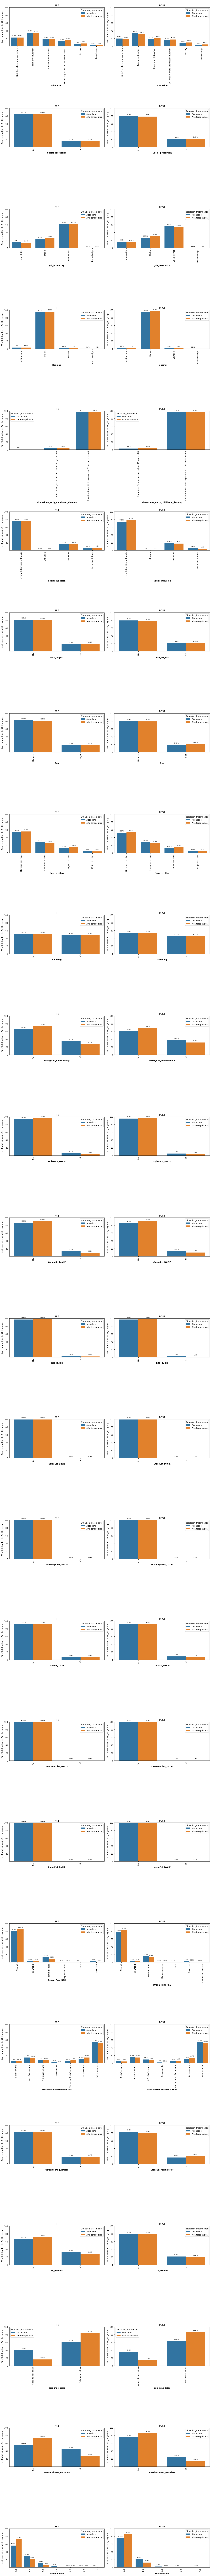

In [53]:
fig, axs = plt.subplots(len(disc_atts), 2, figsize=(15, 7*len(disc_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, disc_att in enumerate(disc_atts):

    # # 1: ALL    
    # plot_count_perc_norm(i, 1, disc_att)
    # axs[i, 0].set_title("\nALL")
    # axs[i, 0].set_xlabel(disc_att, fontweight='bold')
    # axs[i, 0].set_ylabel("% of total within its Sit_tto group")
    # axs[i, 0].tick_params(axis='x', rotation=90)
    
    # 2: PRE
    plot_count_perc_norm(i, 2, disc_att)
    axs[i, 0].set_title("\nPRE")
    axs[i, 0].set_xlabel(disc_att, fontweight='bold')
    axs[i, 0].set_ylabel("% of total within its Sit_tto group")
    axs[i, 0].tick_params(axis='x', rotation=90)

    # 3: POST
    plot_count_perc_norm(i, 3, disc_att)
    axs[i, 1].set_title("\nPOST")
    axs[i, 1].set_xlabel(disc_att, fontweight='bold')
    axs[i, 1].set_ylabel("% of total within its Sit_tto group")
    axs[i, 1].tick_params(axis='x', rotation=90)

    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./results" folder
plt.savefig('./results/norm_countplots.svg', dpi=600, bbox_inches='tight')

##### Distribution of numeric attributes

###### Summary statistics

In [54]:
print(bd[num_atts].describe())

       Structural_conflic  Adherencia_tto_recalc           Age  \
count        33538.000000           33538.000000  33528.000000   
mean         11724.468127               0.734408     43.771147   
std           3232.014158               0.226782     11.820824   
min           5066.840000               0.000000     14.000000   
25%           9473.540000               0.631579     35.000000   
50%          11070.420000               0.777778     44.000000   
75%          14150.670000               0.900000     52.000000   
max          18440.210000               1.000000     87.000000   

       Años_consumo_droga     Tiempo_tx  
count        32820.000000  33538.000000  
mean            26.436350     15.146789  
std             12.588079     12.478334  
min              0.000000      0.000000  
25%             17.000000      7.000000  
50%             26.000000     11.000000  
75%             35.000000     19.000000  
max             75.000000     99.000000  


###### Boxplots

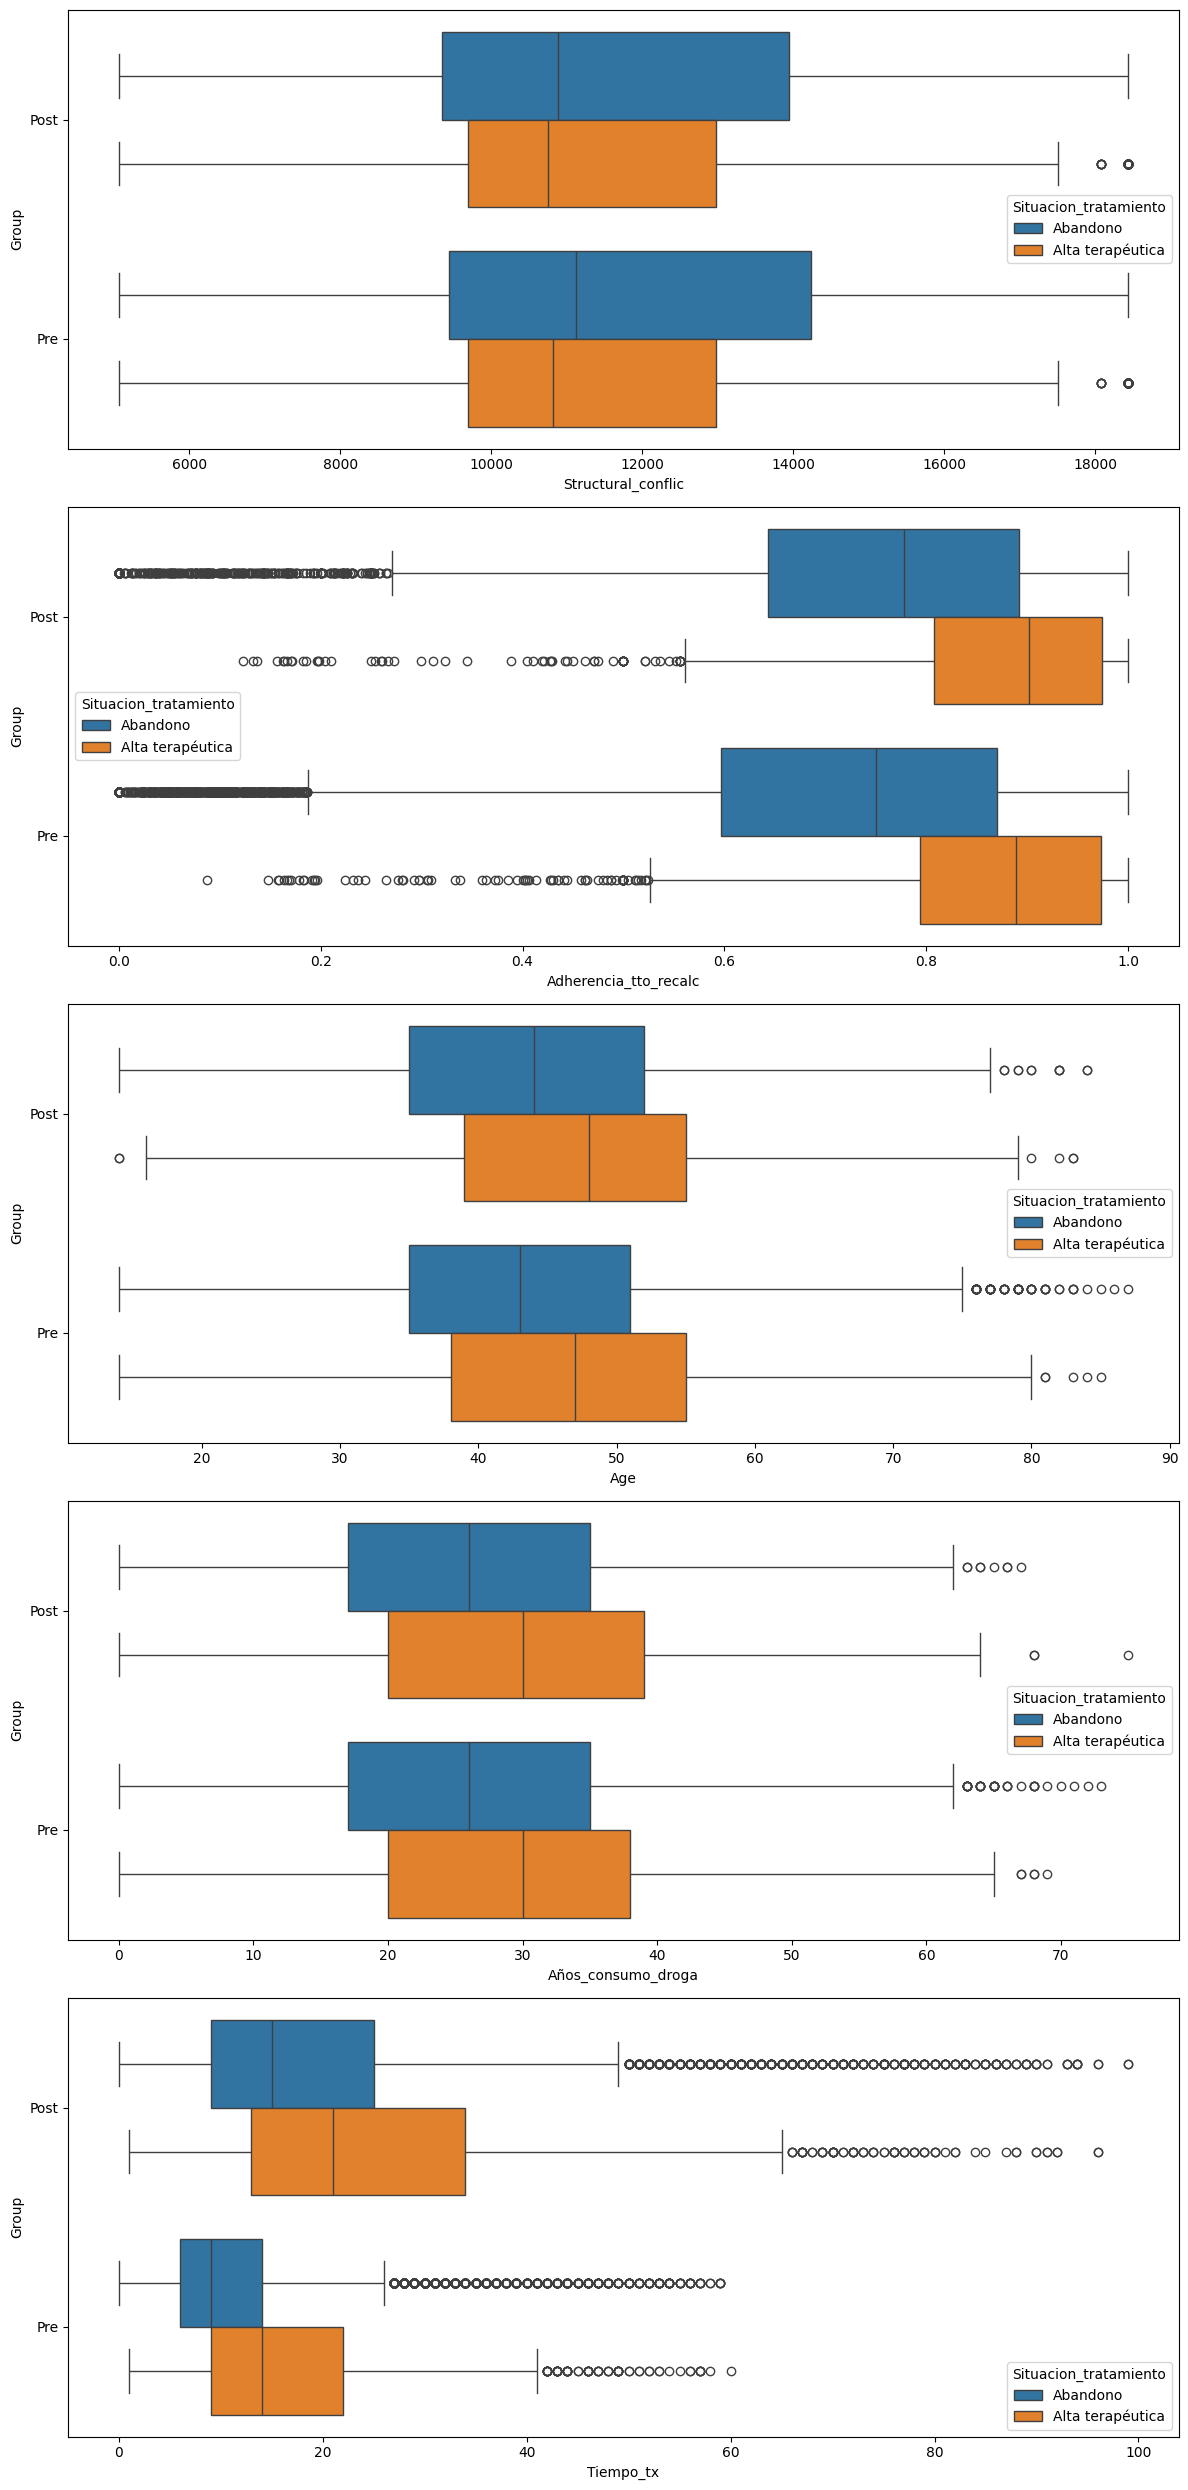

In [55]:
fig, axs = plt.subplots(len(num_atts), 1, figsize=(12, 5*len(num_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, num_att in enumerate(num_atts):
    plt.subplot(len(num_atts), 1, i+1)
    sns.boxplot(
        data=combined_pre_post,
        x = num_att,
        y = 'Group',
        hue='Situacion_tratamiento',
    )

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./results" folder
plt.savefig('./results/boxplots.svg', dpi=600, bbox_inches='tight')

###### Histograms

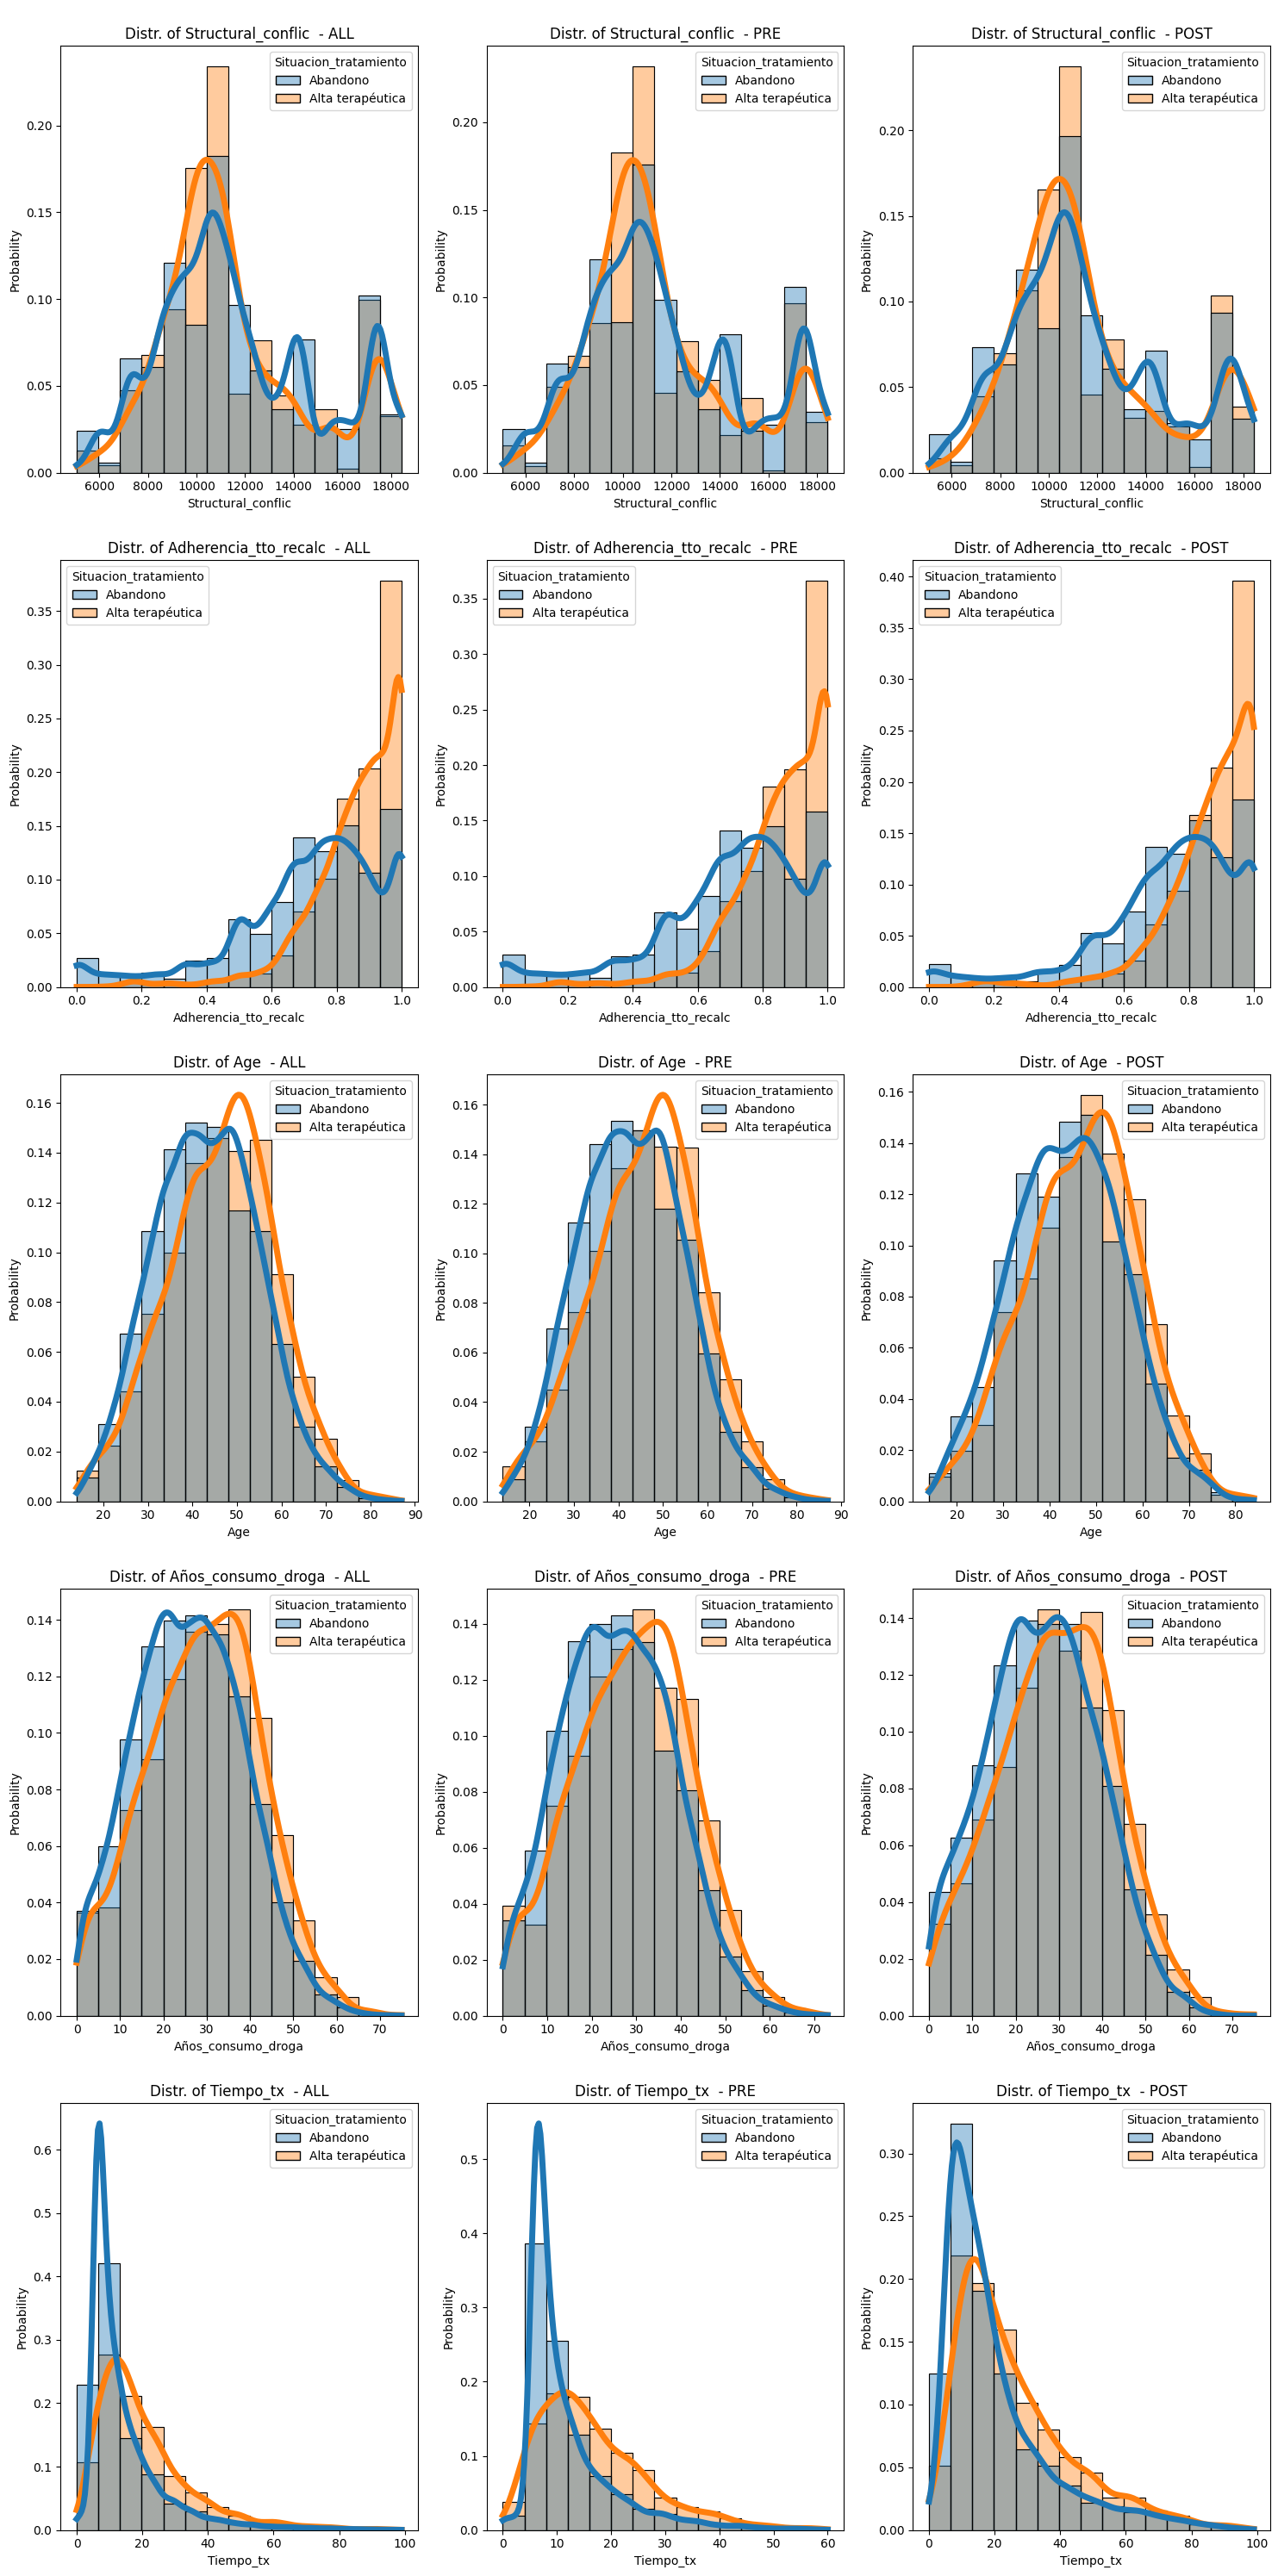

In [56]:
fig, axs = plt.subplots(len(num_atts), 3, figsize=(15, 6*len(num_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, num_att in enumerate(num_atts):

    # 1: All alcohol patients
    sns.histplot(data=bd,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True,
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 0])
    axs[i, 0].set_title(f"\nDistr. of {num_att}  - ALL")

    # 2: PRE
    sns.histplot(data=conj_pre,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True, 
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 1])
    axs[i, 1].set_title(f"\nDistr. of {num_att}  - PRE")

    # Subplot 3: POST
    sns.histplot(data=conj_post,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True, 
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 2])
    axs[i, 2].set_title(f"\nDistr. of {num_att}  - POST")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./results" folder
plt.savefig('./results/histograms.svg', dpi=600, bbox_inches='tight')

#### Correlation Analysis

##### Transforming categorical variables into integers

In [68]:
# Education
education_mapping = {
    'Unknowledge': 0,
    'Not Complete primary school': 1,
    'Primary education': 2,
    'Secondary Education': 3,
    'Secondary more technical education': 4, 
    'Tertiary': 5
}

# Apply mapping to each element in Education and create a new column
bd['Education_REDEF'] = bd['Education'].map(education_mapping)

# --------------------------------------------------------------------------

# Social protection
bd['Social_protection_REDEF'] = bd['Social_protection'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# Job_insecurity
job_mapping = {
    'unkwnodledge': 0,
    'Unemployed': 1,
    'Non-stable': 2,
    'Stable': 3,
}

bd['Job_insecurity_REDEF'] = bd['Job_insecurity'].map(job_mapping)

# --------------------------------------------------------------------------

# 'Housing'
housing_mapping = {
    'unknowledge': 0,
    'Unstable': 1,
    'Institutional': 2,
    'Stable': 3,
}

bd['Housing_REDEF'] = bd['Housing'].map(housing_mapping)

# --------------------------------------------------------------------------

# 'Alterations_early_childhood_develop'
alterations_mapping = {
    'No alterations (first exposure at 11 or more years)' : 0,
    'Alterations (first exposure before 11 years old)': 1,
    '': -1 # temp
}

bd['Alterations_early_childhood_develop_REDEF'] = bd['Alterations_early_childhood_develop'].map(alterations_mapping)

# --------------------------------------------------------------------------

# 'Social_inclusion'
social_inc_mapping = {
    'Unknown': 0, 
    'live alone': 1,
    'live in institutions': 2,
    'Live with families or friends': 3
}

bd['Social_inclusion_REDEF'] = bd['Social_inclusion'].map(social_inc_mapping)

# --------------------------------------------------------------------------

# 'Risk_stigma'
bd['Risk_stigma_REDEF'] = bd['Risk_stigma'].map({'No':0, 'Yes':1})

# --------------------------------------------------------------------------

# 'Sex'
bd['Sex_REDEF'] = bd['Sex'].map({'Hombre':0, 'Mujer':1})

# --------------------------------------------------------------------------

# 'Smoking'
bd['Smoking_REDEF'] = bd['Smoking'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Biological_vulnerability'
bd['Biological_vulnerability_REDEF'] = bd['Biological_vulnerability'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Droga_DxCIE'
bd['Opiaceos_DxCIE_REDEF'] = bd['Opiaceos_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Cannabis_DXCIE_REDEF'] = bd['Cannabis_DXCIE'].map({'No': 0, 'Sí': 1})
bd['BZD_DxCIE_REDEF'] = bd['BZD_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Cocaina_DxCIE_REDEF'] = bd['Cocaina_DxCIE'].map({'No': 0, 'Sí': 1})
bd['OtrosEst_DxCIE_REDEF'] = bd['OtrosEst_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Alucinogenos_DXCIE_REDEF'] = bd['Alucinogenos_DXCIE'].map({'No': 0, 'Sí': 1})
bd['Tabaco_DXCIE_REDEF'] = bd['Tabaco_DXCIE'].map({'No': 0, 'Sí': 1})
bd['SustVolatiles_DXCIE_REDEF'] = bd['SustVolatiles_DXCIE'].map({'No': 0, 'Sí': 1})
bd['JuegoPat_DxCIE_REDEF'] = bd['JuegoPat_DxCIE'].map({'No': 0, 'Sí': 1})

# --------------------------------------------------------------------------

'Droga_Ppal_REC'
droga_ppl_mapping = {
    'Opiáceos': 1,
    'Estimulantes': 2,
    'Hipnosedantes': 3,
    'Sustancias volátiles': 4,
    'Cannabis': 5,
    'NPS': 6,
    'Alcohol': 7
}

bd['Droga_Ppal_REC_REDEF'] = bd['Droga_Ppal_REC'].map(droga_ppl_mapping)

# --------------------------------------------------------------------------

# 'FrecuenciaConsumo30Dias'
frec_mapping = {
    'Desconocido': 0,
    'No consumio': 1,
    'Menos de 1 día\u200e/semana': 2,
    '1 día/semana': 3,
    '2-3 días\u200e/semana': 4,
    '4-6 días/semana': 5,
    'Todos los días': 6,
}

bd['FrecuenciaConsumo30Dias_REDEF'] = bd['FrecuenciaConsumo30Dias'].map(frec_mapping)

# --------------------------------------------------------------------------

# 'OtrosDx_Psiquiatrico'
bd['OtrosDx_Psiquiatrico_REDEF'] = bd['OtrosDx_Psiquiatrico'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Tx_previos'
bd['Tx_previos_REDEF'] = bd['Tx_previos'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Seis_mas_Citas_REDEF'
bd['Seis_mas_Citas_REDEF'] = bd['Seis_mas_Citas'].map({'Menos de seis citas':0, 'Seis o más citas':1})

# --------------------------------------------------------------------------

# 'Situacion_tratamiento'
bd['Situacion_tratamiento_REDEF'] = bd['Situacion_tratamiento'].map({'Abandono':0, 'Alta terapéutica':1})

# --------------------------------------------------------------------------

# 'Sexo_x_Hijos'
sexo_hijos_mapping = {
    'Hombre sin hijos': 0,
    'Hombre con hijos': 1, 
    'Mujer sin hijos': 2,
    'Mujer con hijos': 3
}

bd['Sexo_x_Hijos_REDEF'] = bd['Sexo_x_Hijos'].map(sexo_hijos_mapping)

# --------------------------------------------------------------------------

##### Defining groups of variables

In [58]:
social_vars = ['Education', 'Social_protection', 'Job_insecurity', 'Housing', 'Alterations_early_childhood_develop', 
            'Social_inclusion', 'Risk_stigma', 'Structural_conflic']
ind_vars = ['Age', 'Sex', 'Sexo_x_Hijos', 'Smoking', 'Biological_vulnerability', 'Opiaceos_DxCIE', 
            'Cannabis_DXCIE', 'BZD_DxCIE', 'Cocaina_DxCIE', 'OtrosEst_DxCIE', 'Alucinogenos_DXCIE', 'Tabaco_DXCIE', 
            'SustVolatiles_DXCIE', 'JuegoPat_DxCIE', 'Droga_Ppal_REC', 'FrecuenciaConsumo30Dias', 'Años_consumo_droga',
            'OtrosDx_Psiquiatrico', 'Tx_previos', 'Adherencia_tto_recalc','Seis_mas_Citas'] 
target_var = 'Situacion_tratamiento'

In [59]:
# Columns that are already numeric and we don't need to redefine 
no_redef_cols = ['Structural_conflic', 'Age', 'Años_consumo_droga', 'Adherencia_tto_recalc']

In [ ]:
# res_vars = ['Tiempo_tx', 'Readmisiones_estudios', 'Periodos_COVID', 'Pandemia_inicio_fin_tratamiento', 
#            'Nreadmision', 'Readmisiones_PRECOVID', 'Readmisiones_COVID']

###### One-hot encoding categorical attributes

In [69]:
# Original approach
one_hot_vars = []

In [60]:
# Specify columns to one hot encode; empty list otherwise
one_hot_vars = ['Droga_Ppal_REC', 'Sexo_x_Hijos', 'Education',
                'Job_insecurity', 'Housing', 'Social_inclusion', 'FrecuenciaConsumo30Dias'] 

one_hots_vars_prefix = {
    'Droga_Ppal_REC': 'DrogP',
    'Sexo_x_Hijos': 'SexHij',
    'Education': 'Ed',
    'Job_insecurity': 'JobIn',
    'Housing': 'Hous', 
    'Social_inclusion': 'SocInc',
    'FrecuenciaConsumo30Dias': 'Frec30',
}

one_hot_cols_dic = {}

for one_hot_var in one_hot_vars:
    # Create one hot encoding version of attribute and concatenate new columns to main df
    encoded_var = pd.get_dummies(bd[one_hot_var], prefix=one_hots_vars_prefix[one_hot_var])
    bd = pd.concat([bd, encoded_var], axis=1)
    one_hot_cols_dic[one_hot_var] = encoded_var.columns.tolist()

print(one_hot_cols_dic['FrecuenciaConsumo30Dias'])

['Frec30_1 día/semana', 'Frec30_2-3 días\u200e/semana', 'Frec30_4-6 días/semana', 'Frec30_Desconocido', 'Frec30_Menos de 1 día\u200e/semana', 'Frec30_No consumio', 'Frec30_Todos los días']


###### Defining final version of columns of interest

In [70]:
soc_vars_enc = []
for soc_var in social_vars:
    # If no need to redefine, append directly
    if soc_var in no_redef_cols:
        soc_vars_enc.append(soc_var)
    # If need to redefine
    else:
        # Check if it was one-hot encoded
        if soc_var in one_hot_vars:
            # Append all one hot columns
            soc_vars_enc = soc_vars_enc + one_hot_cols_dic[soc_var]
        # If not, use redefined version through mapping
        else:
            soc_vars_enc.append(soc_var + '_REDEF')

ind_vars_enc = []
for ind_var in ind_vars:
    # If no need to redefine, append directly
    if ind_var in no_redef_cols:
        ind_vars_enc.append(ind_var)
    # If need to redefine
    else:
        # Check if it was one-hot encoded
        if ind_var in one_hot_vars:
            # Append all one hot columns
            ind_vars_enc = ind_vars_enc + one_hot_cols_dic[ind_var]
        # If not, use redefined version through mapping
        else:
            ind_vars_enc.append(ind_var + '_REDEF')

# Final version of columns we need to use for correlation analysis
corr_cols = soc_vars_enc + ind_vars_enc

###### Update main dfs

In [71]:
# Pre-pandemic
conj_pre = bd[bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio y fin prepandemia']
# Pre-pandemic abandono
pre_abandono = conj_pre[conj_pre['Situacion_tratamiento'] == 'Abandono']
# Pre-pandemic alta
pre_alta = conj_pre[conj_pre['Situacion_tratamiento'] == 'Alta terapéutica']

# Post-pandemic
# Merging last two classes to balance sets
conj_post = bd[(bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio prepandemia y fin en pandemia') | 
               (bd['Pandemia_inicio_fin_tratamiento'] == 'inicio y fin en pandemia')]
# Post-pandemic abandono
post_abandono = conj_post[conj_post['Situacion_tratamiento'] == 'Abandono']
# Post-pandemic alta
post_alta = conj_post[conj_post['Situacion_tratamiento'] == 'Alta terapéutica']

##### Plotting a correlation heatmap

In [64]:
def plot_heatmap(sit_tto: int, group:int) -> None:
    """
        sit_tto: 1 (include it as another var), 2 (only abandono), 3 (only alta)
        group: 1 (all alcohol patients), 2 (pre), 3 (post)
    """

    # Define columns based on sit_tto arg
    if sit_tto == 1:
        # Include target as another variable
        cols = [target_var + '_REDEF'] + corr_cols
    else:
        cols = corr_cols
        
    # Title plot and select datat based on group and sit_tto
    if group == 1:
        plot_title = "Correl Matrix - ALL"
        if sit_tto == 1:
            bd_ca = bd[cols]
        elif sit_tto == 2:
            bd_ca = bd[bd['Situacion_tratamiento'] == 'Abandono'][cols]
        elif sit_tto == 3:
            bd_ca = bd[bd['Situacion_tratamiento'] == 'Alta terapéutica'][cols]
    elif group == 2:
        plot_title = "Correl Matrix - PRE"
        if sit_tto == 1:    
            bd_ca = conj_pre[cols]
        elif sit_tto == 2:
            bd_ca = pre_abandono[cols]
        elif sit_tto == 3:
            bd_ca = pre_alta[cols]
    elif group == 3:
        plot_title = "Correl Matrix - POST"
        if sit_tto == 1:    
            bd_ca = conj_post[cols]
        elif sit_tto == 2:
            bd_ca = post_abandono[cols]
        elif sit_tto == 3:
            bd_ca = post_alta[cols]
            
    # Complete title
    if sit_tto == 2:
        plot_title += " - ABANDONO"
    elif sit_tto == 3:
        plot_title += " - ALTA"

    corr_matrix = bd_ca.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create heatmap correlation matrix
    dataplot = sns.heatmap(corr_matrix, mask=mask, xticklabels=cols, yticklabels=cols, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 4})

    # Group ind vs social vars by color and modify tick label names
    for tick_label in dataplot.axes.xaxis.get_ticklabels():
        if tick_label.get_text() in ind_vars_enc:
            tick_label.set_color('green')
        elif tick_label.get_text() in soc_vars_enc:
            tick_label.set_color('purple')  
    for tick_label in dataplot.axes.yaxis.get_ticklabels():
        if tick_label.get_text() in ind_vars_enc:
            tick_label.set_color('green')
        elif tick_label.get_text() in soc_vars_enc:
            tick_label.set_color('purple') 

    # Increase the size of xtick labels
    # dataplot.tick_params(axis='x', labelsize=12)

    # Increase the size of ytick labels
    # dataplot.tick_params(axis='y', labelsize=12)

    # Add legend and place it in lower left 
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Social Factors', markerfacecolor='purple', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Individual Factors', markerfacecolor='green', markersize=10)
    ], bbox_to_anchor=(-0.1, -0.1), fontsize = 20)

    plt.title("\n\n" + plot_title, fontdict={'fontsize': 30, 'fontweight': 'bold'})

###### Original approach (all categorical mapped to integers)

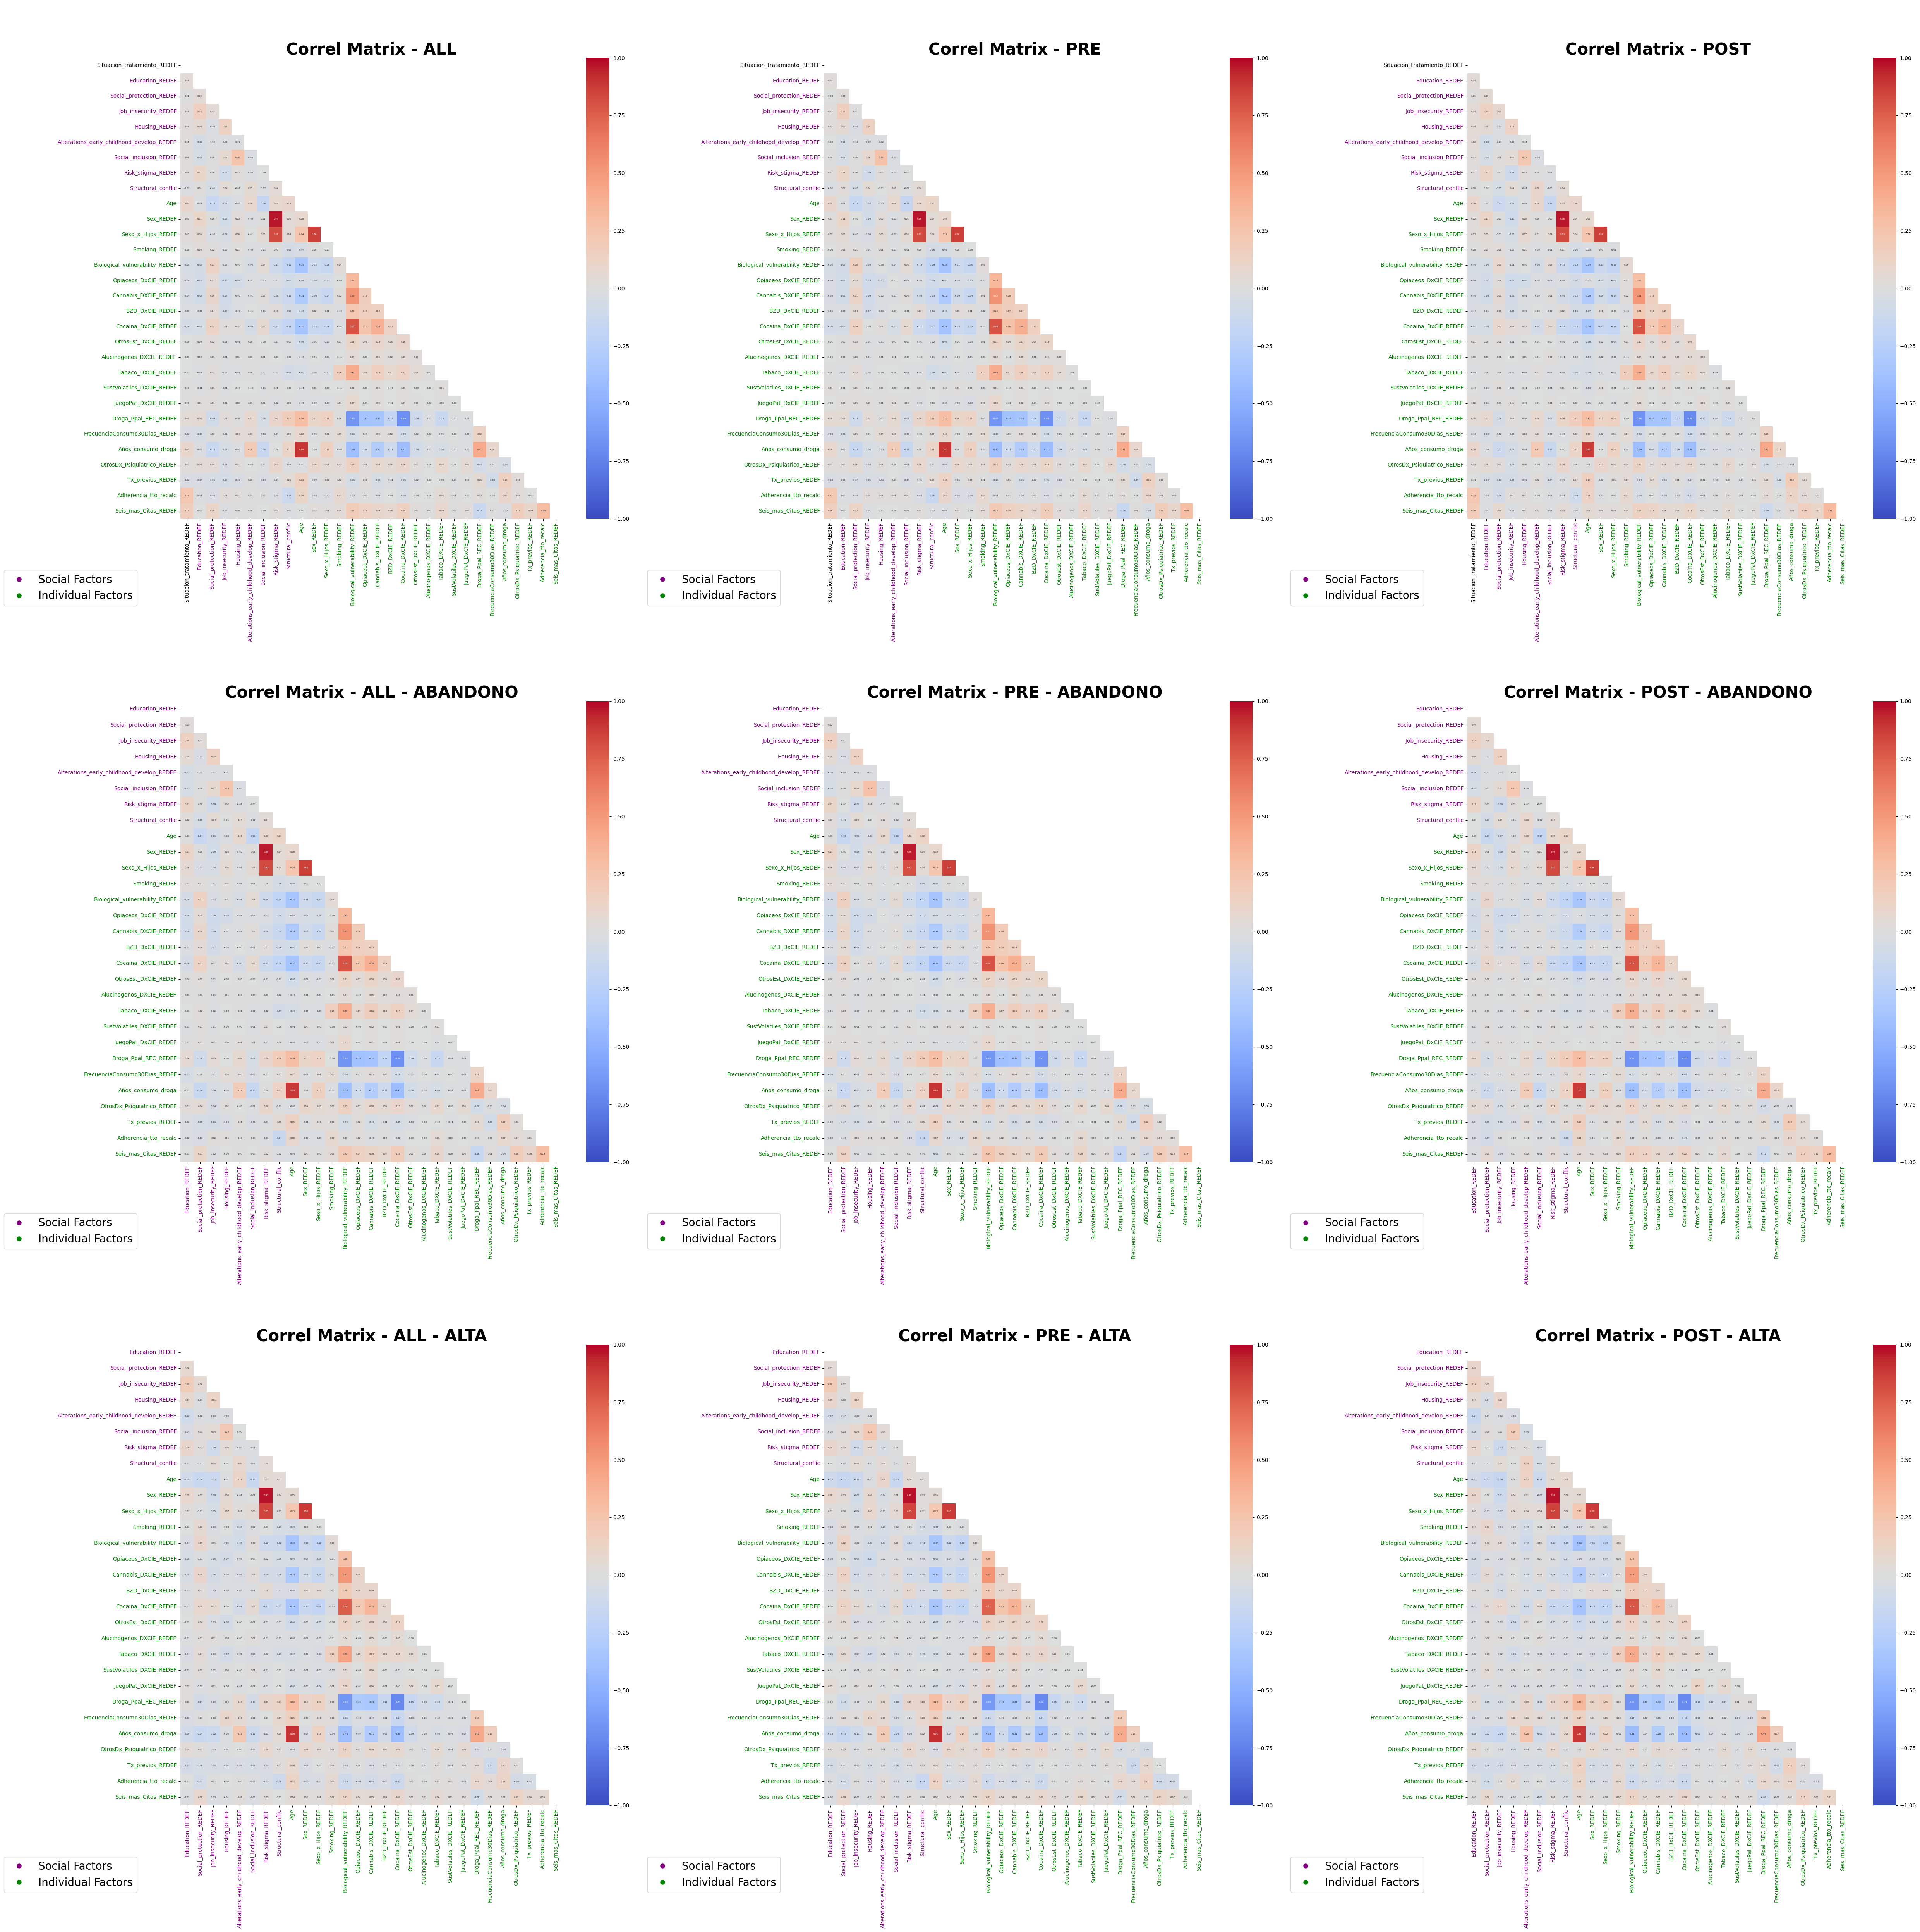

In [72]:
fig, axs = plt.subplots(3, 3, figsize=(50, 50))
plt.subplots_adjust(hspace=0.75, wspace=2)

# Go through possible values for 'Situacion_tratamiento' and 'Group'
for sit_tto in range(1,4):
    for group in range(1,4):
        plt.subplot(3, 3, 3*(sit_tto-1) + group)  # Calculate the subplot position dynamically
        plot_heatmap(sit_tto, group)
        
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format in the "./results" folder
plt.savefig('./results/heatmaps_original.svg', dpi=550, bbox_inches='tight')

###### One-hot encoding approach

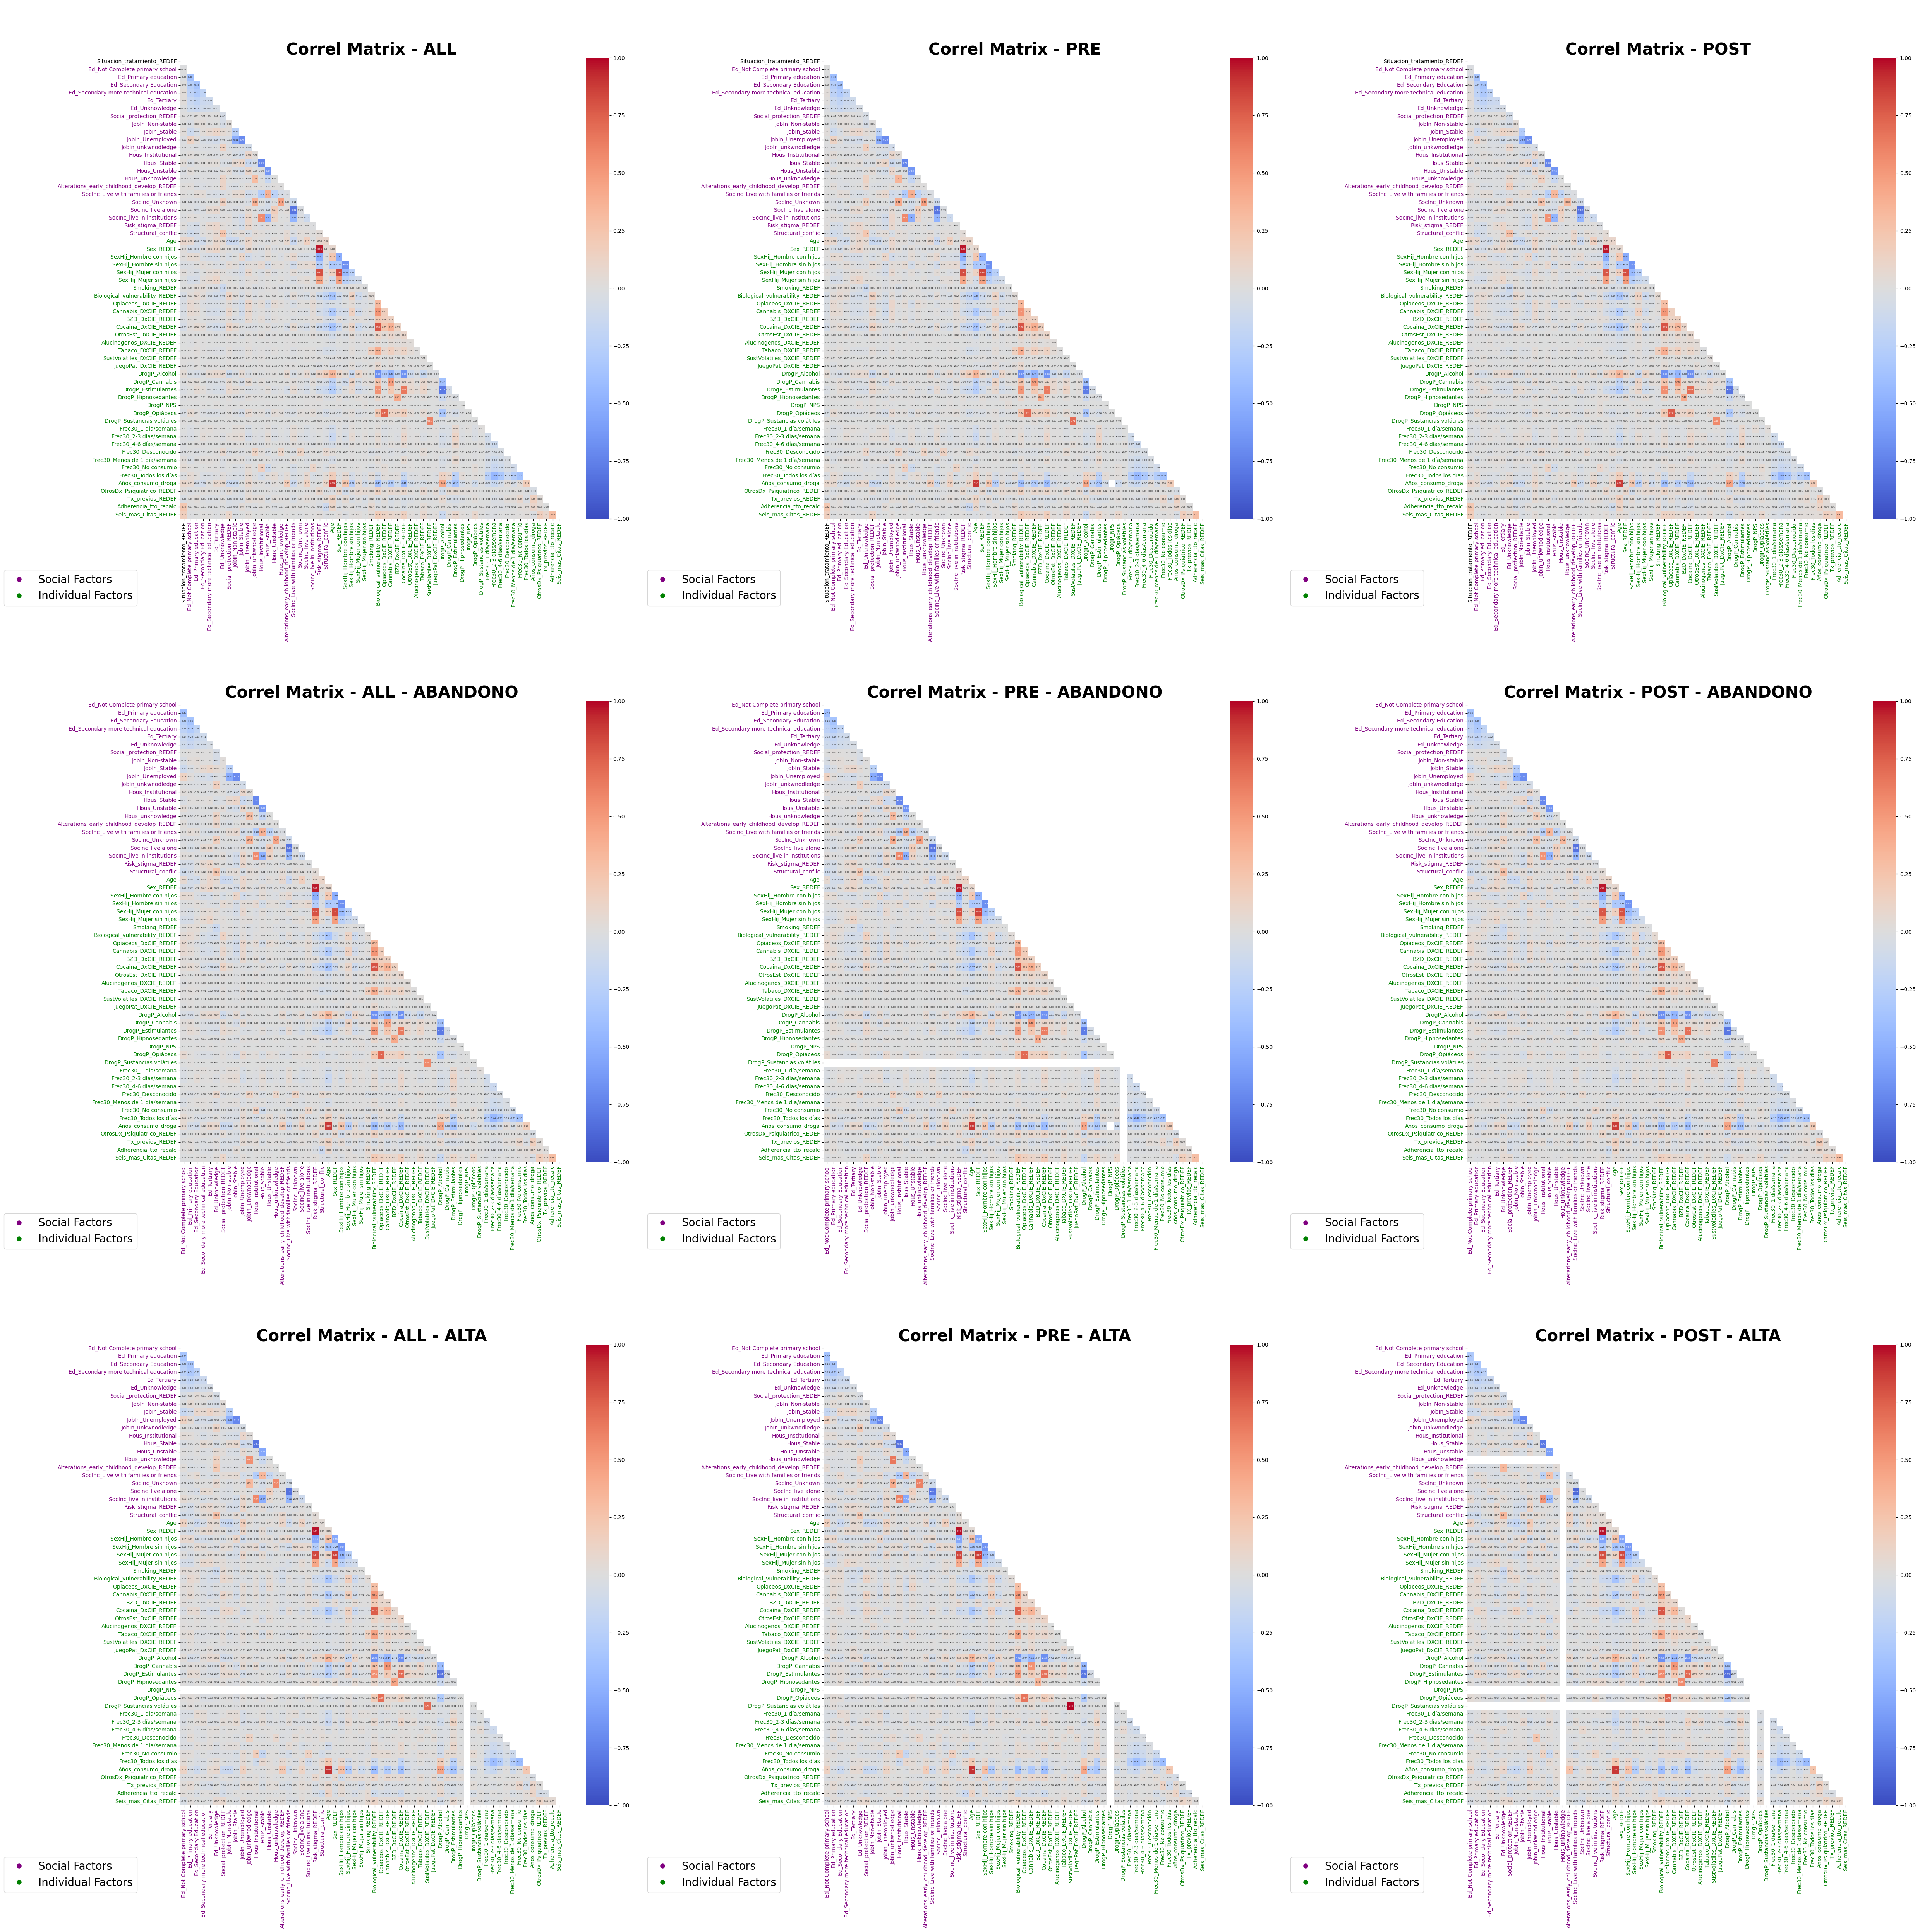

In [65]:
fig, axs = plt.subplots(3, 3, figsize=(50, 50))
plt.subplots_adjust(hspace=0.75, wspace=2)

# Go through possible values for 'Situacion_tratamiento' and 'Group'
for sit_tto in range(1,4):
    for group in range(1,4):
        plt.subplot(3, 3, 3*(sit_tto-1) + group)  # Calculate the subplot position dynamically
        plot_heatmap(sit_tto, group)
        
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format in the "./results" folder
plt.savefig('./results/heatmaps_one_hot.svg', dpi=550, bbox_inches='tight')